In [1]:
import numpy as np
class AHP:
    """
    相关信息的传入和准备
    """
 
    def __init__(self, array):
        ## 记录矩阵相关信息
        self.array = array
        ## 记录矩阵大小
        self.n = array.shape[0]
        # 初始化RI值，用于一致性检验
        self.RI_list = [0, 0, 0.52, 0.89, 1.12, 1.26, 1.36, 1.41, 1.46, 1.49, 1.52, 1.54, 1.56, 1.58,
                        1.59]
        # 矩阵的特征值和特征向量
        self.eig_val, self.eig_vector = np.linalg.eig(self.array)
        # 矩阵的最大特征值
        self.max_eig_val = np.max(self.eig_val)
        # 矩阵最大特征值对应的特征向量
        self.max_eig_vector = self.eig_vector[:, np.argmax(self.eig_val)].real
        # 矩阵的一致性指标CI
        self.CI_val = (self.max_eig_val - self.n) / (self.n - 1)
        # 矩阵的一致性比例CR
        self.CR_val = self.CI_val / (self.RI_list[self.n - 1])
 
    """
    一致性判断
    """
 
    def test_consist(self):
        # 打印矩阵的一致性指标CI和一致性比例CR
        print("判断矩阵的CI值为：" + str(self.CI_val))
        print("判断矩阵的CR值为：" + str(self.CR_val))
        # 进行一致性检验判断
        if self.n == 2:  # 当只有两个子因素的情况
            print("仅包含两个子因素，不存在一致性问题")
        else:
            if self.CR_val < 0.1:  # CR值小于0.1，可以通过一致性检验
                print("判断矩阵的CR值为" + str(self.CR_val) + ",通过一致性检验")
                return True
            else:  # CR值大于0.1, 一致性检验不通过
                print("判断矩阵的CR值为" + str(self.CR_val) + "未通过一致性检验")
                return False
 
    """
    算术平均法求权重
    """
 
    def cal_weight_by_arithmetic_method(self):
        # 求矩阵的每列的和
        col_sum = np.sum(self.array, axis=0)
        # 将判断矩阵按照列归一化
        array_normed = self.array / col_sum
        # 计算权重向量
        array_weight = np.sum(array_normed, axis=1) / self.n
        # 打印权重向量
        print("算术平均法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight
 
    """
    几何平均法求权重
    """
 
    def cal_weight__by_geometric_method(self):
        # 求矩阵的每列的积
        col_product = np.product(self.array, axis=0)
        # 将得到的积向量的每个分量进行开n次方
        array_power = np.power(col_product, 1 / self.n)
        # 将列向量归一化
        array_weight = array_power / np.sum(array_power)
        # 打印权重向量
        print("几何平均法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight
 
    """
    特征值法求权重
    """
 
    def cal_weight__by_eigenvalue_method(self):
        # 将矩阵最大特征值对应的特征向量进行归一化处理就得到了权重
        array_weight = self.max_eig_vector / np.sum(self.max_eig_vector)
        # 打印权重向量
        print("特征值法计算得到的权重向量为：\n", array_weight)
        # 返回权重向量的值
        return array_weight

In [ ]:
### 初次计算试用随机生成的形式
import random
def contrast_matrix_generation():
    A=np.zeros(7)
    for i in range(7):
        A[i]=random.randint(1,9)
    b=np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            b[i][j]=A[i]/A[j]
    weight=AHP(b).cal_weight__by_eigenvalue_method()
    AHP(b).test_consist()
    return A,b,weight

In [3]:
## 读取岗位信息
import pandas as pd
data1=pd.read_excel('AHP(未MAX-MIN归一化).xlsx','特征1-4',index_col=0)
data2=pd.read_excel('AHP(未MAX-MIN归一化).xlsx','特征5',index_col=0,skiprows=[0])
data3=pd.read_excel('AHP(未MAX-MIN归一化).xlsx','特征6',index_col=0,skiprows=[0,2])
data3=data3.drop('Unnamed: 1',axis=1)
data4=pd.read_excel('AHP(未MAX-MIN归一化).xlsx','特征7',index_col=0,skiprows=[0,2])
data4=data4.drop('Unnamed: 1',axis=1)
data3.head()
sc=pd.read_excel('学生对因素的打分情况.xlsx',index_col=0)

In [4]:
## 对岗位信息做归一化处理，并转化为数组类型方便后续计算
columns1 = data1.columns.tolist()
columns2 = data2.columns.tolist()
columns3 = data3.columns.tolist()
columns4 = data4.columns.tolist()
for x in columns1:
    s=(data1[x]-data1[x].min())/(data1[x].max()-data1[x].min())
    data1[x]=s
arr1=data1.values

for x in columns2:
    s=1-(data2[x]-data2[x].min())/(data2[x].max()-data2[x].min())
    data2[x]=s
arr2=data2.values

for x in columns3:
    s=(data3[x]-data3[x].min())/(data3[x].max()-data3[x].min())
    data3[x]=s
arr3=data3.values

for x in columns4:
    s=(data4[x]-data4[x].min())/(data4[x].max()-data4[x].min())
    data4[x]=s
arr4=data4.values

In [18]:
import math
scc=np.zeros((26,7))
wei=np.zeros((26,7))
score=np.zeros((31,26))
for k in range(26):
    A,b,w=contrast_matrix_generation()
    print('学生的职业倾向打分为：',A,'\n学生打分的权重为：',w)
    for m in range(7):
        scc[k][m]=A[m]
        wei[k][m]=w[m]
    for i in range(31):
        for j in range(7):
            if j<4:
                y=arr1[i,j]*w[j]*100
            elif j==4:
                if math.isnan(arr2[i,k]):
                    score[i][k]=0
                    break
                else:
                    y=arr2[i,k]*w[j]*100
            elif j==5:
                if math.isnan(arr3[i,k]):
                    score[i][k]=0
                    break
                else:
                    y=arr3[i,k]*w[j]*100
            elif j==6:
                if math.isnan(arr4[i,k]):
                    score[i][k]=0
                    break
                else:
                    y=arr4[i,k]*w[j]*100
            score[i][k]=score[i][k]+y   

特征值法计算得到的权重向量为：
 [0.05128205 0.1025641  0.15384615 0.15384615 0.17948718 0.17948718
 0.17948718]
判断矩阵的CI值为：0.0
判断矩阵的CR值为：0.0
判断矩阵的CR值为0.0,通过一致性检验
学生的职业倾向打分为： [2. 4. 6. 6. 7. 7. 7.] 
学生打分的权重为： [0.05128205 0.1025641  0.15384615 0.15384615 0.17948718 0.17948718
 0.17948718]
特征值法计算得到的权重向量为：
 [0.15151515 0.12121212 0.06060606 0.15151515 0.06060606 0.27272727
 0.18181818]
判断矩阵的CI值为：(-4.440892098500626e-16+0j)
判断矩阵的CR值为：(-3.265361837132813e-16+0j)
判断矩阵的CR值为(-3.265361837132813e-16+0j),通过一致性检验
学生的职业倾向打分为： [5. 4. 2. 5. 2. 9. 6.] 
学生打分的权重为： [0.15151515 0.12121212 0.06060606 0.15151515 0.06060606 0.27272727
 0.18181818]
特征值法计算得到的权重向量为：
 [0.05882353 0.05882353 0.05882353 0.05882353 0.29411765 0.05882353
 0.41176471]
判断矩阵的CI值为：0j
判断矩阵的CR值为：0j
判断矩阵的CR值为0j,通过一致性检验
学生的职业倾向打分为： [1. 1. 1. 1. 5. 1. 7.] 
学生打分的权重为： [0.05882353 0.05882353 0.05882353 0.05882353 0.29411765 0.05882353
 0.41176471]
特征值法计算得到的权重向量为：
 [0.125   0.25    0.1875  0.15625 0.1875  0.0625  0.03125]
判断矩阵的CI值为：0.0
判断矩阵的CR值为：0.0
判断矩阵的CR值为0.0

In [19]:
data_df0 = pd.DataFrame(scc)
data_df0.columns=['每周净薪资WW','灵活度F','疫情风险C','安全指数SF','通勤距离D','久坐程度PA','社交需求SI']
data_df0.index=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
writer0 = pd.ExcelWriter('学生对因素的打分情况12.xlsx')
data_df0.to_excel(writer0,'因素打分',float_format='%.2f') # float_format 控制精度
writer0.save()
writer0.close()
## 为决策树创建简便的数据集
print('更改前：\n',scc)
for i in range(26):
    for j in range(7):
        if scc[i][j]<4:
            scc[i][j]=0
        elif scc[i][j]<7:
            scc[i][j]=1
        else:
            scc[i][j]=2
print('更改后：\n',scc)

更改前：
 [[2. 4. 6. 6. 7. 7. 7.]
 [5. 4. 2. 5. 2. 9. 6.]
 [1. 1. 1. 1. 5. 1. 7.]
 [4. 8. 6. 5. 6. 2. 1.]
 [2. 7. 8. 8. 8. 7. 5.]
 [6. 4. 6. 3. 6. 4. 3.]
 [3. 1. 8. 6. 4. 7. 2.]
 [3. 1. 7. 8. 8. 8. 4.]
 [6. 7. 8. 6. 9. 7. 6.]
 [7. 3. 5. 1. 5. 4. 1.]
 [5. 4. 5. 9. 8. 2. 8.]
 [1. 4. 2. 2. 7. 1. 5.]
 [2. 4. 6. 5. 1. 2. 6.]
 [8. 3. 1. 4. 3. 4. 5.]
 [2. 1. 6. 2. 6. 4. 2.]
 [3. 5. 7. 5. 4. 8. 6.]
 [1. 2. 3. 7. 5. 2. 9.]
 [5. 7. 2. 5. 6. 3. 2.]
 [1. 9. 2. 5. 8. 8. 3.]
 [6. 3. 9. 9. 6. 9. 3.]
 [9. 6. 5. 7. 4. 8. 8.]
 [2. 3. 9. 5. 4. 8. 5.]
 [3. 2. 2. 7. 1. 7. 8.]
 [2. 8. 1. 7. 8. 8. 3.]
 [7. 3. 5. 8. 4. 3. 3.]
 [9. 3. 3. 9. 8. 4. 3.]]
更改后：
 [[0. 1. 1. 1. 2. 2. 2.]
 [1. 1. 0. 1. 0. 2. 1.]
 [0. 0. 0. 0. 1. 0. 2.]
 [1. 2. 1. 1. 1. 0. 0.]
 [0. 2. 2. 2. 2. 2. 1.]
 [1. 1. 1. 0. 1. 1. 0.]
 [0. 0. 2. 1. 1. 2. 0.]
 [0. 0. 2. 2. 2. 2. 1.]
 [1. 2. 2. 1. 2. 2. 1.]
 [2. 0. 1. 0. 1. 1. 0.]
 [1. 1. 1. 2. 2. 0. 2.]
 [0. 1. 0. 0. 2. 0. 1.]
 [0. 1. 1. 1. 0. 0. 1.]
 [2. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1. 0.]
 [0

In [20]:
data_df1 = pd.DataFrame(score)
data_df1.columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
data_df1.index=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
writer1 = pd.ExcelWriter('所有学生的工作打分12.xlsx')
data_df1.to_excel(writer1,'工作打分',float_format='%.8f') # float_format 控制精度

data_df2 = pd.DataFrame(scc)
data_df2.columns=['每周净薪资WW','灵活度F','疫情风险C','安全指数SF','通勤距离D','久坐程度PA','社交需求SI']
data_df2.index=data_df1.columns
data_df2.to_excel(writer1,'因素打分',float_format='%.2f') # float_format 控制精度

data_df3 = pd.DataFrame(wei)
data_df3.columns=['每周净薪资WW','灵活度F','疫情风险C','安全指数SF','通勤距离D','久坐程度PA','社交需求SI']
data_df3.index=data_df1.columns
data_df3.to_excel(writer1,'权重信息',float_format='%.8f') # float_format 控制精度

writer1.save()
writer1.close()

In [21]:
name_dict = {
    0: "学生A对各个职业的打分",
    1: "学生B对各个职业的打分",
    2: "学生C对各个职业的打分",
    3: "学生D对各个职业的打分",
    4: "学生E对各个职业的打分",
    5: "学生F对各个职业的打分",
    6: "学生G对各个职业的打分",
    7: "学生H对各个职业的打分",
    8: "学生I对各个职业的打分",
    9: "学生J对各个职业的打分",
    10: "学生K对各个职业的打分",
    11: "学生L对各个职业的打分",
    12: "学生M对各个职业的打分",
    13: "学生N对各个职业的打分",
    14: "学生O对各个职业的打分",
    15: "学生P对各个职业的打分",
    16: "学生Q对各个职业的打分",
    17: "学生R对各个职业的打分",
    18: "学生S对各个职业的打分",
    19: "学生T对各个职业的打分",
    20: "学生U对各个职业的打分",
    21: "学生V对各个职业的打分",
    22: "学生W对各个职业的打分",
    23: "学生X对各个职业的打分",
    24: "学生Y对各个职业的打分",
    25: "学生Z对各个职业的打分" ,
}

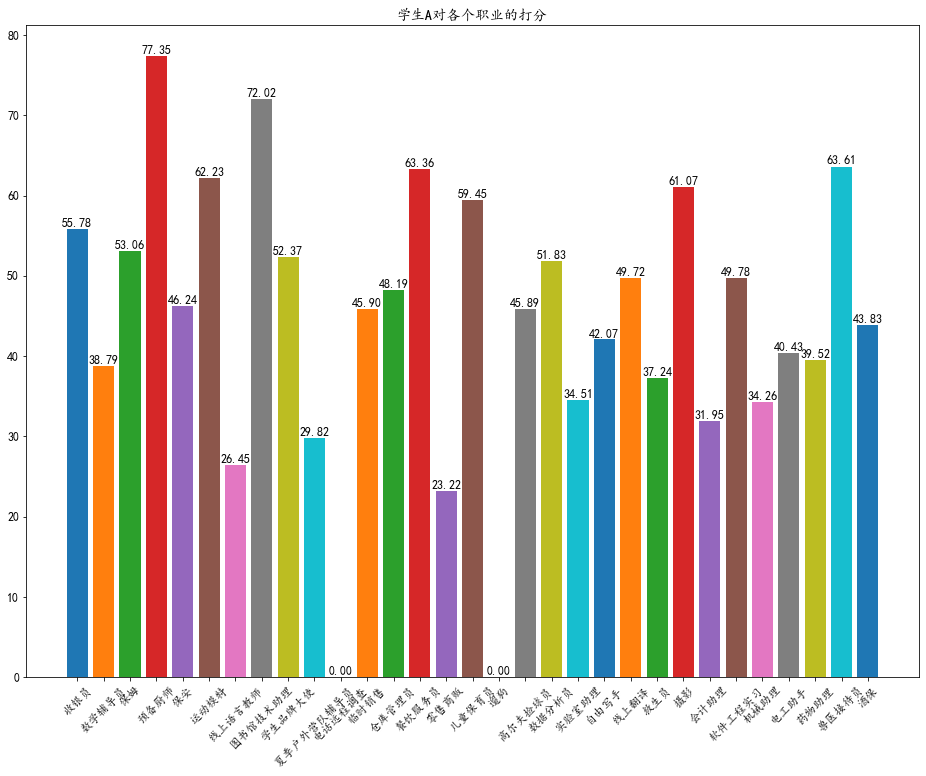

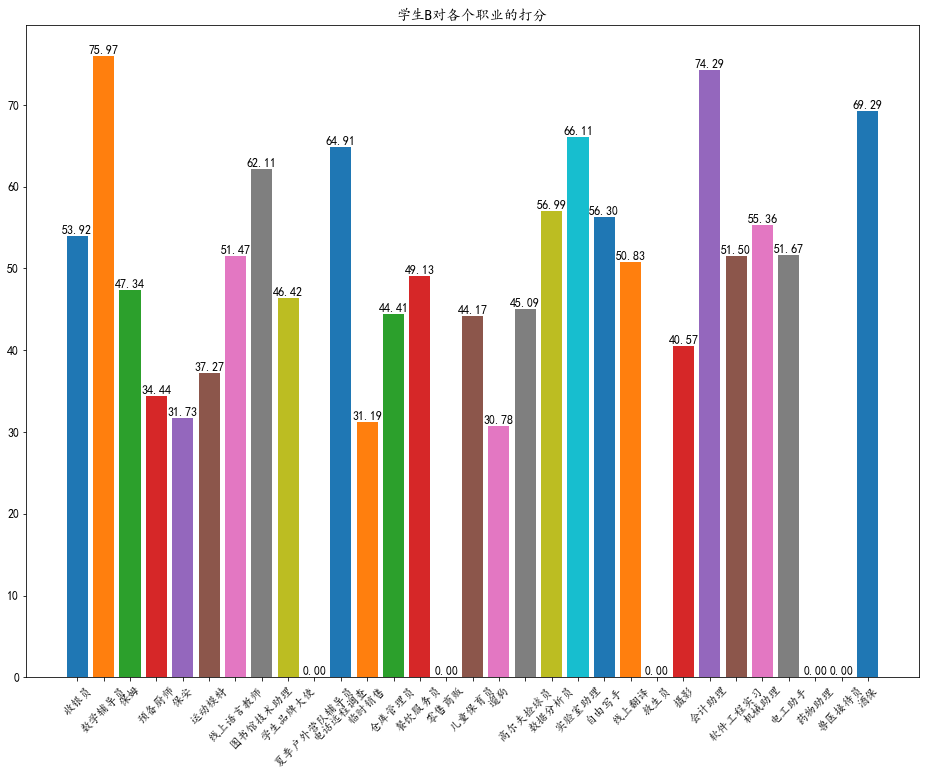

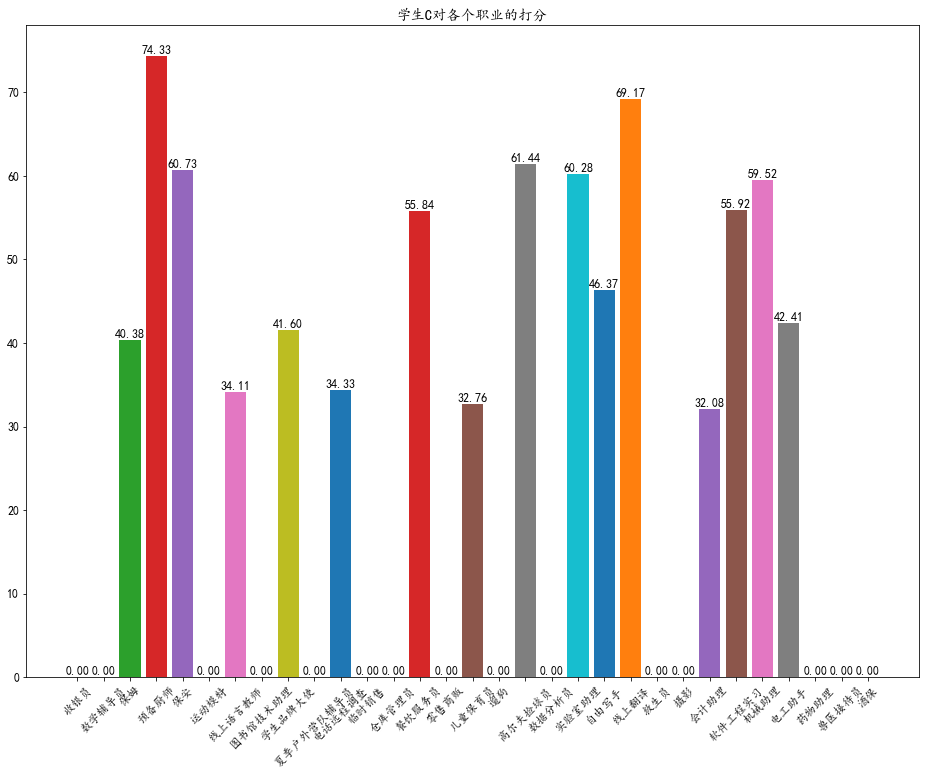

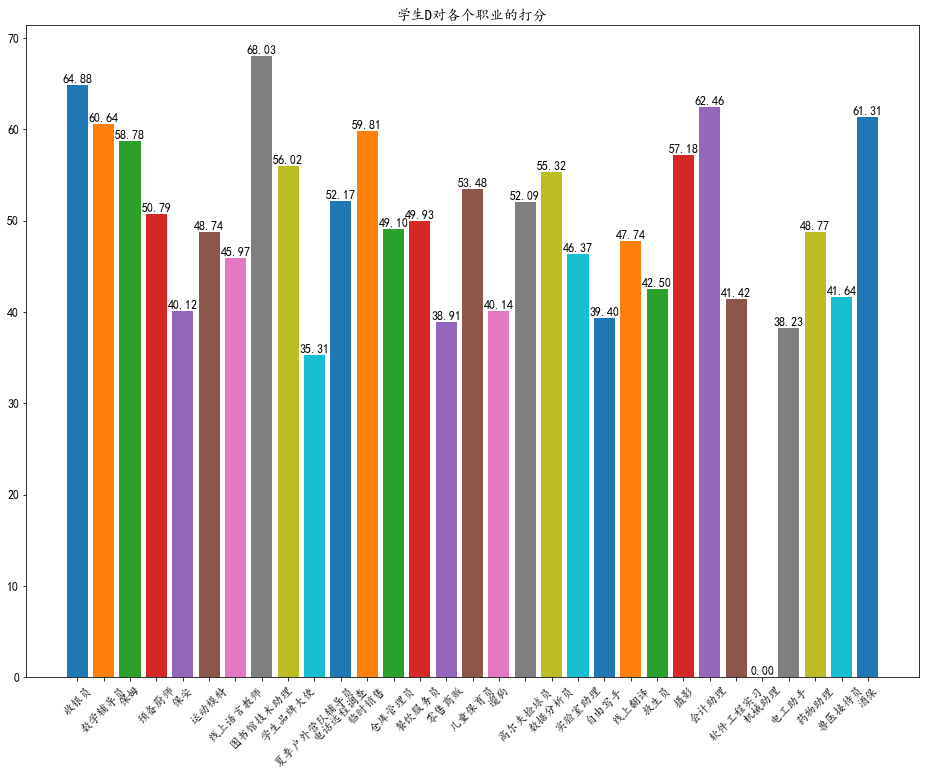

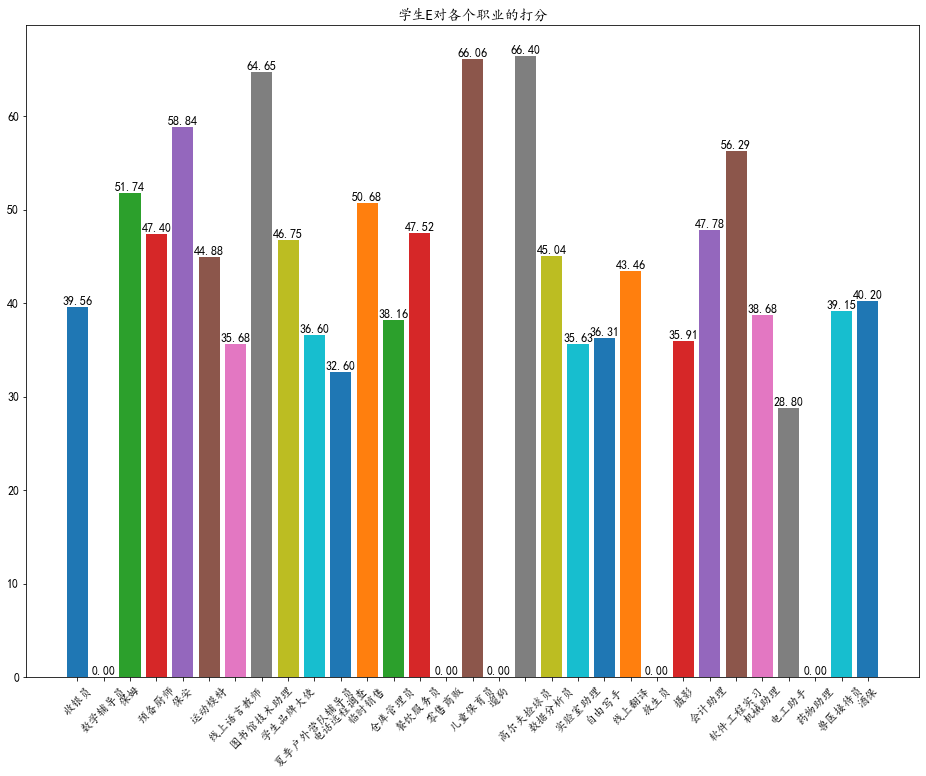

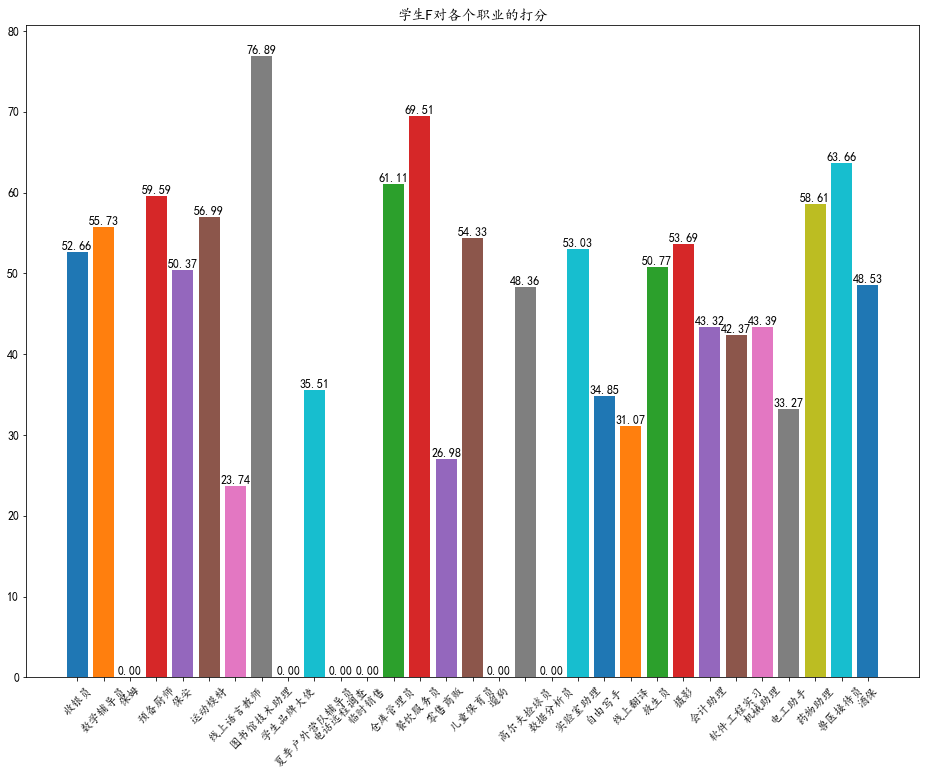

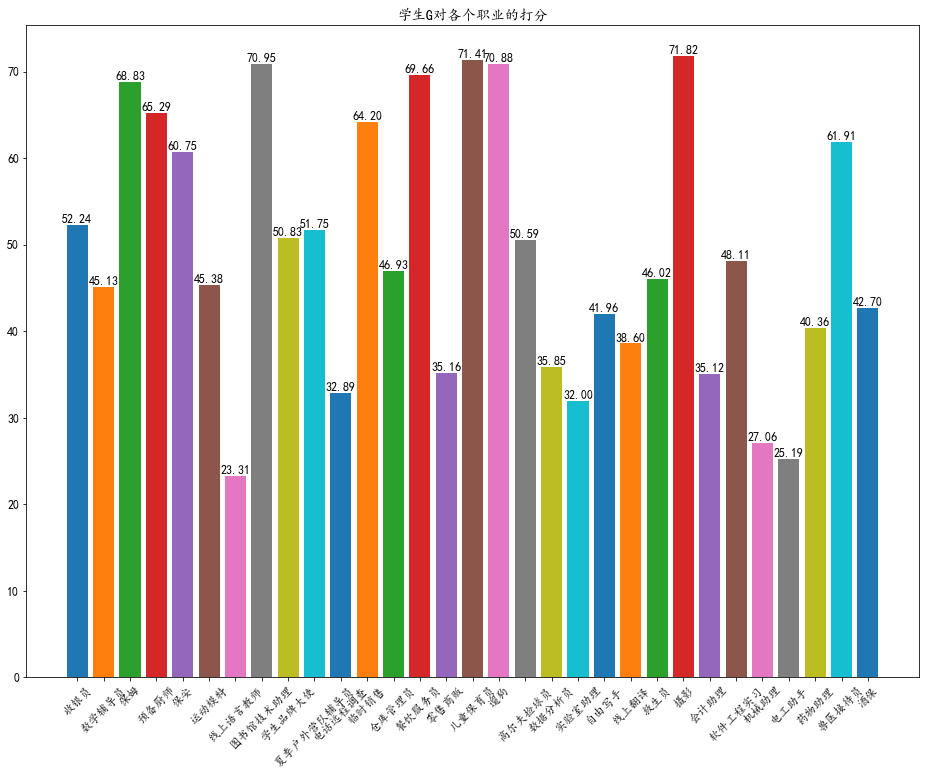

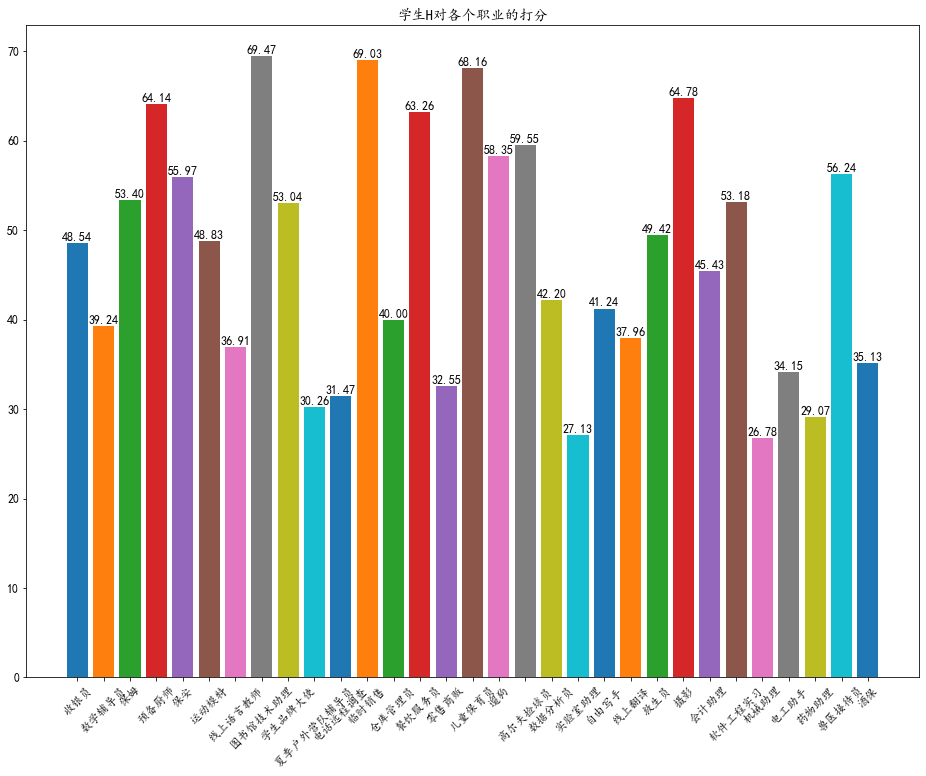

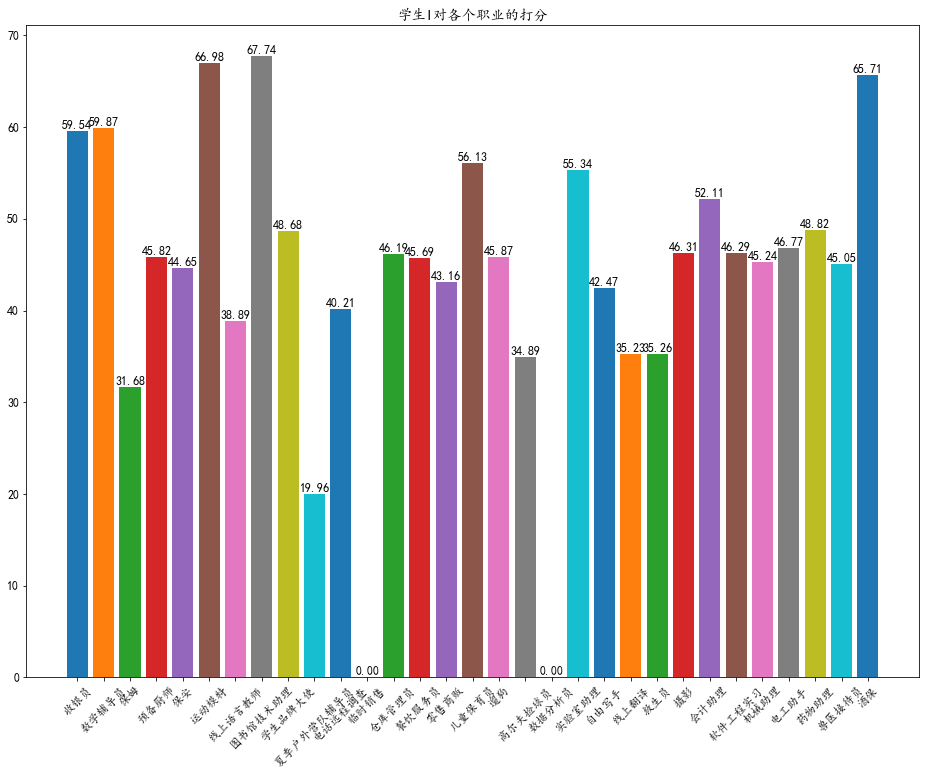

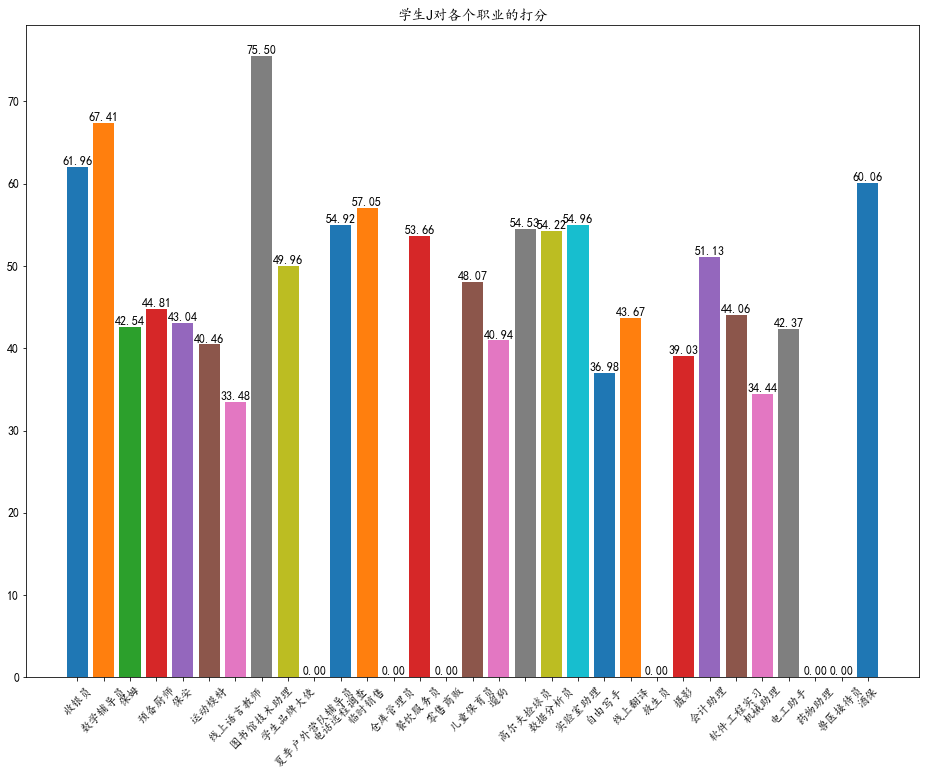

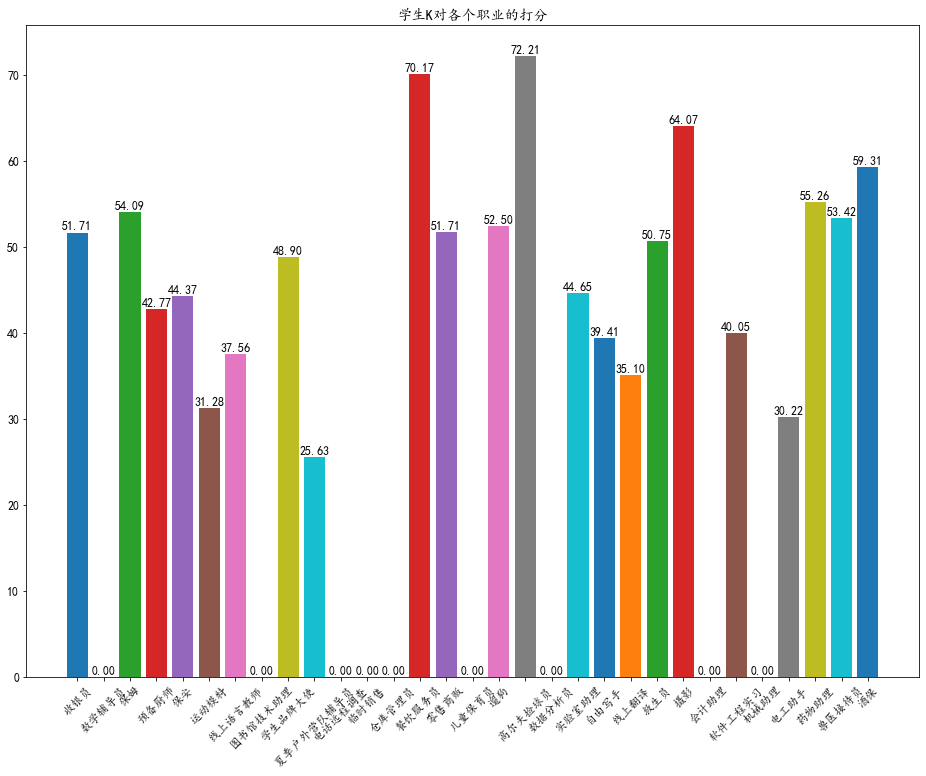

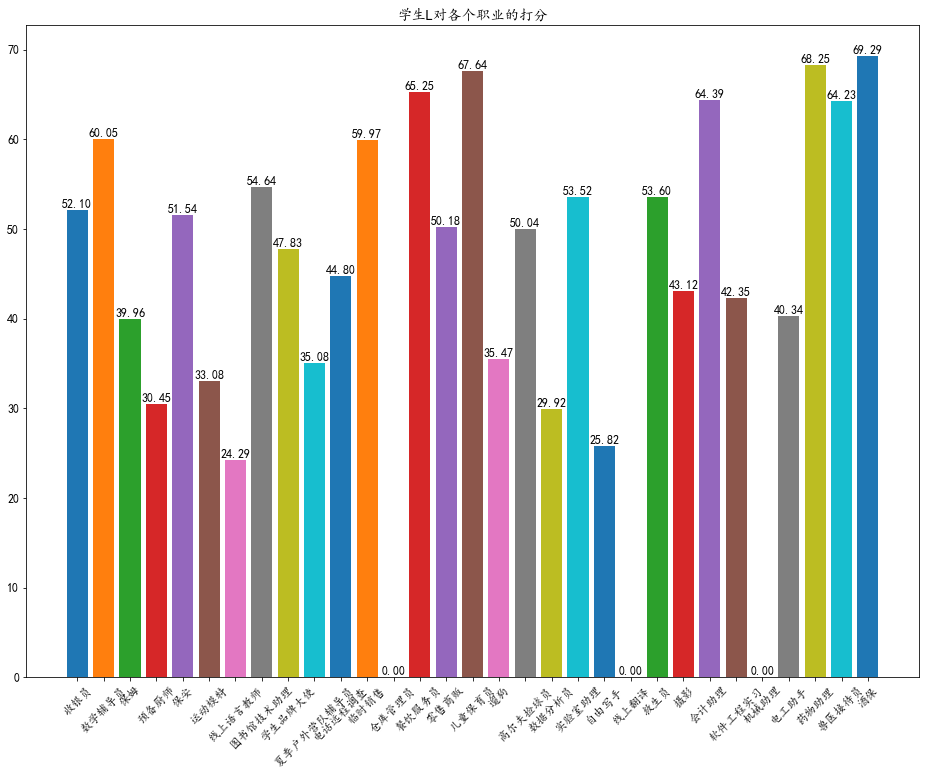

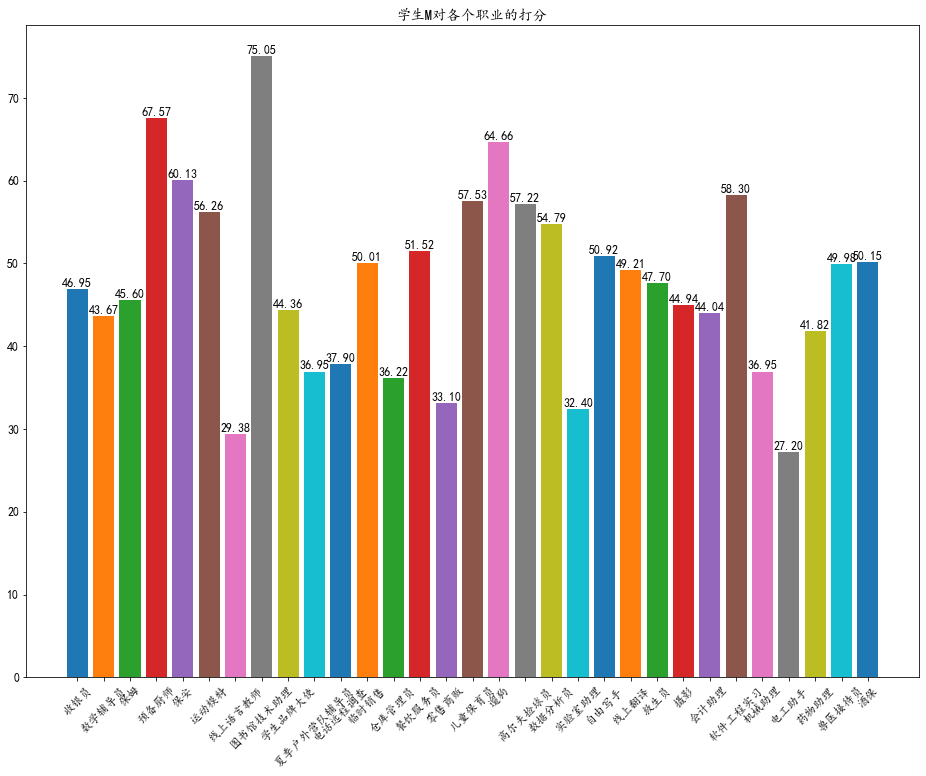

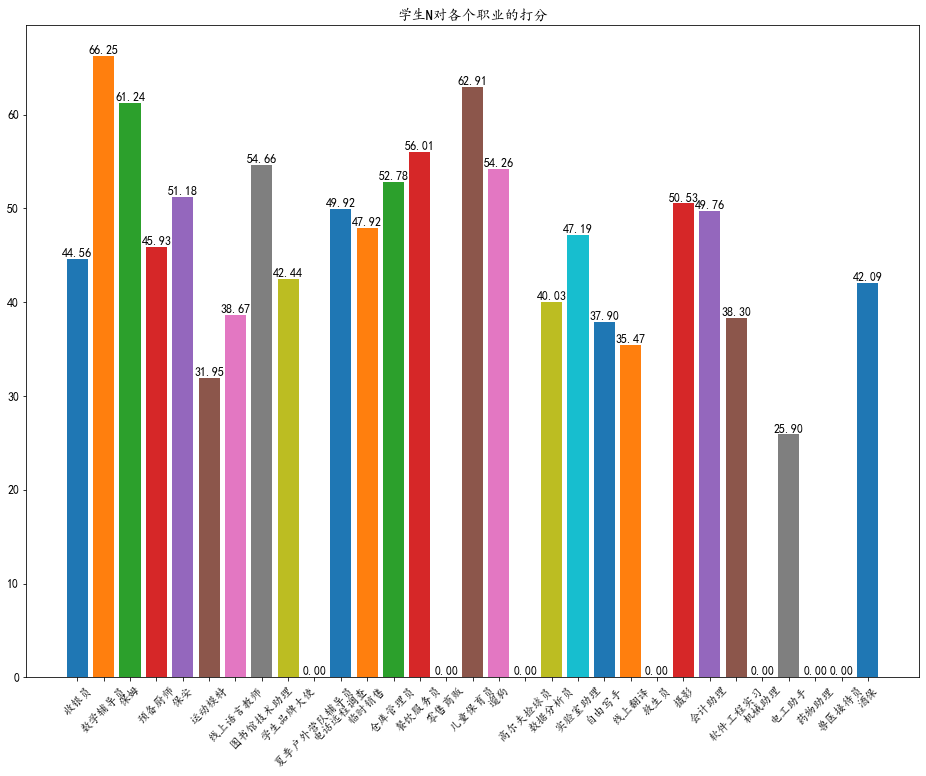

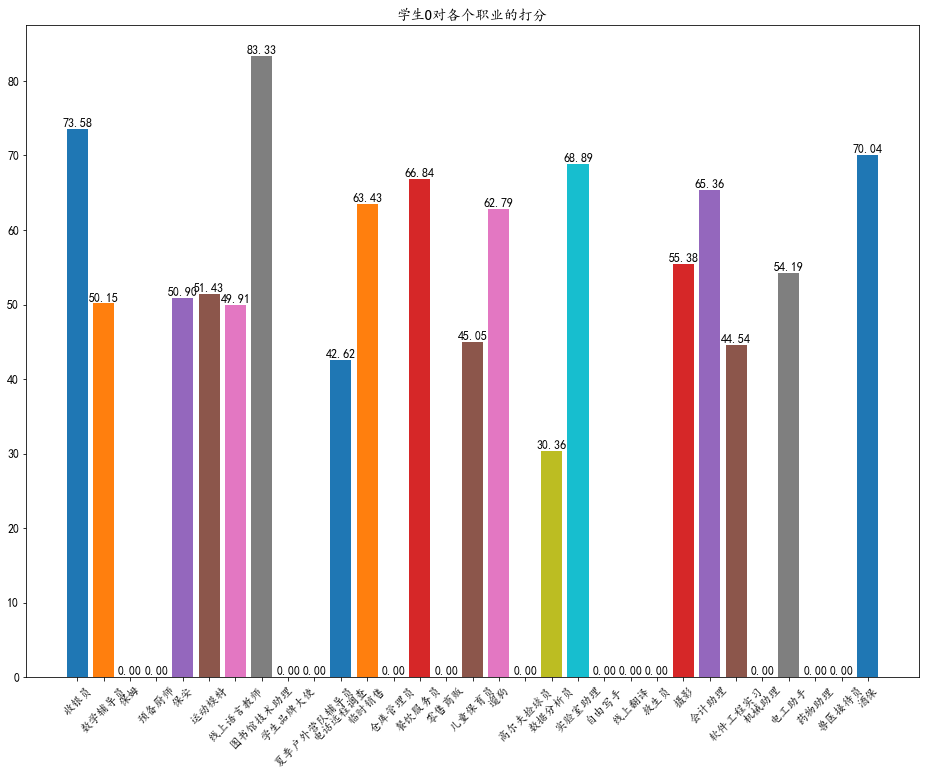

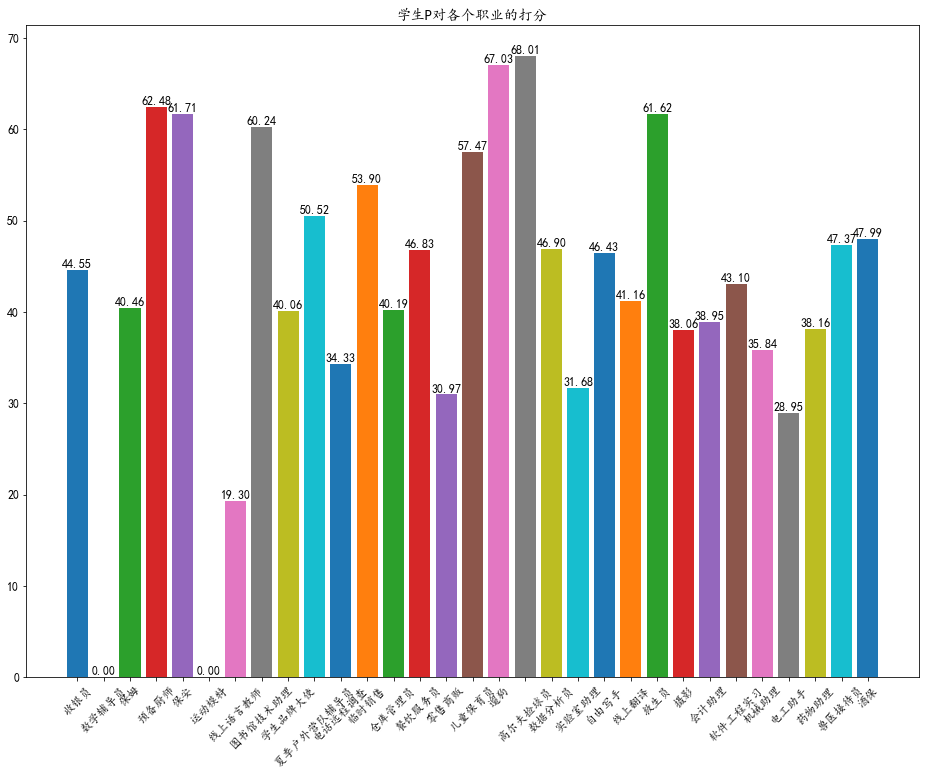

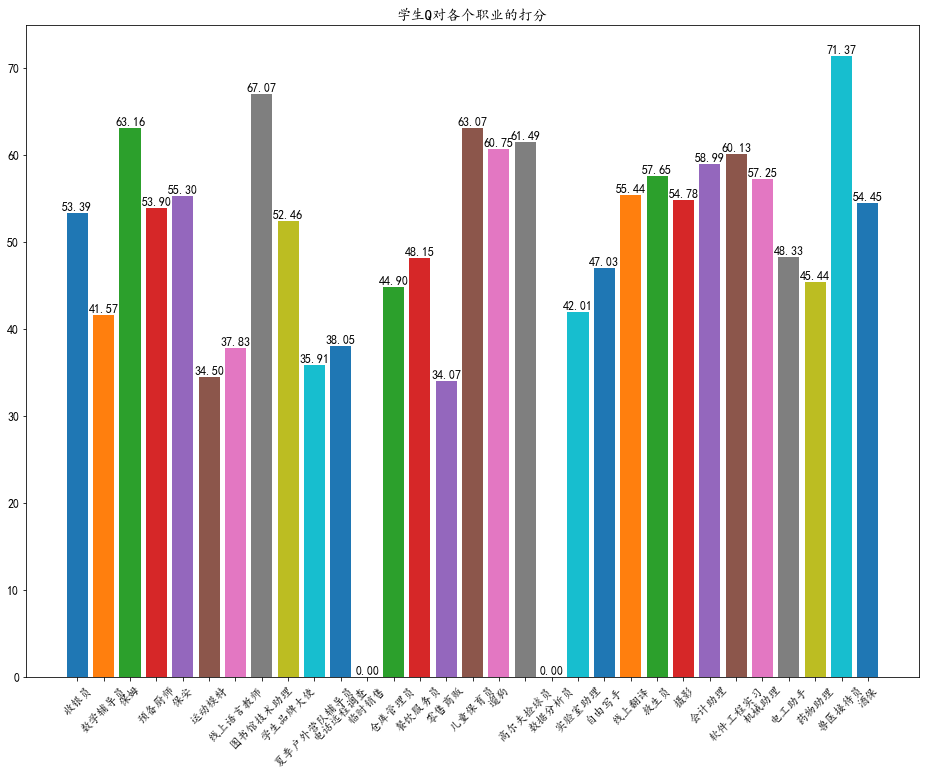

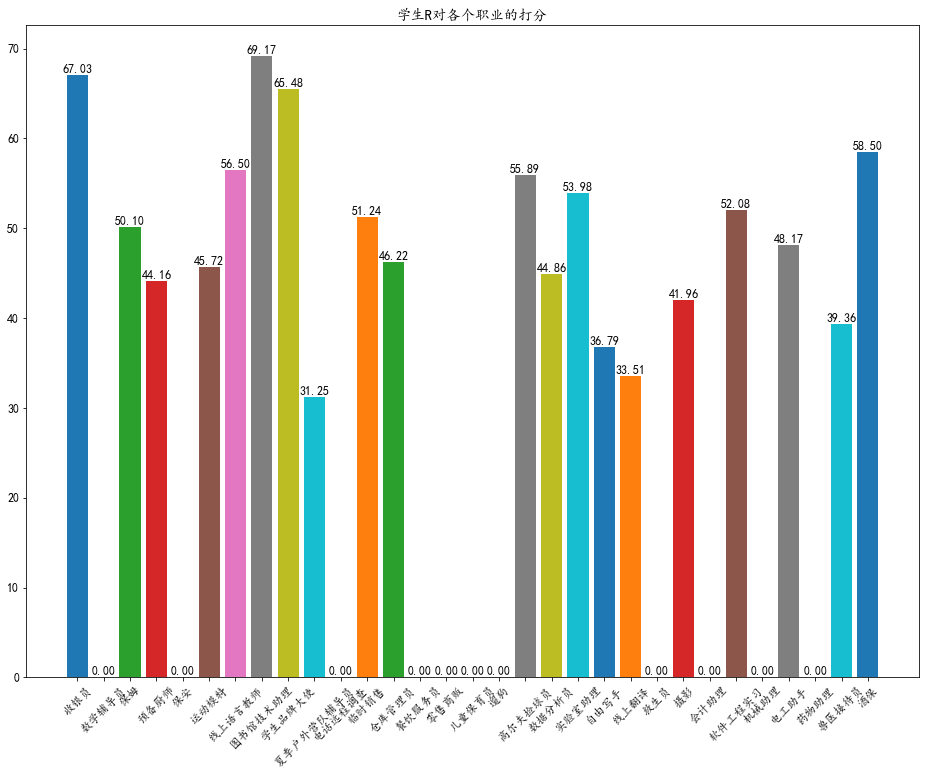

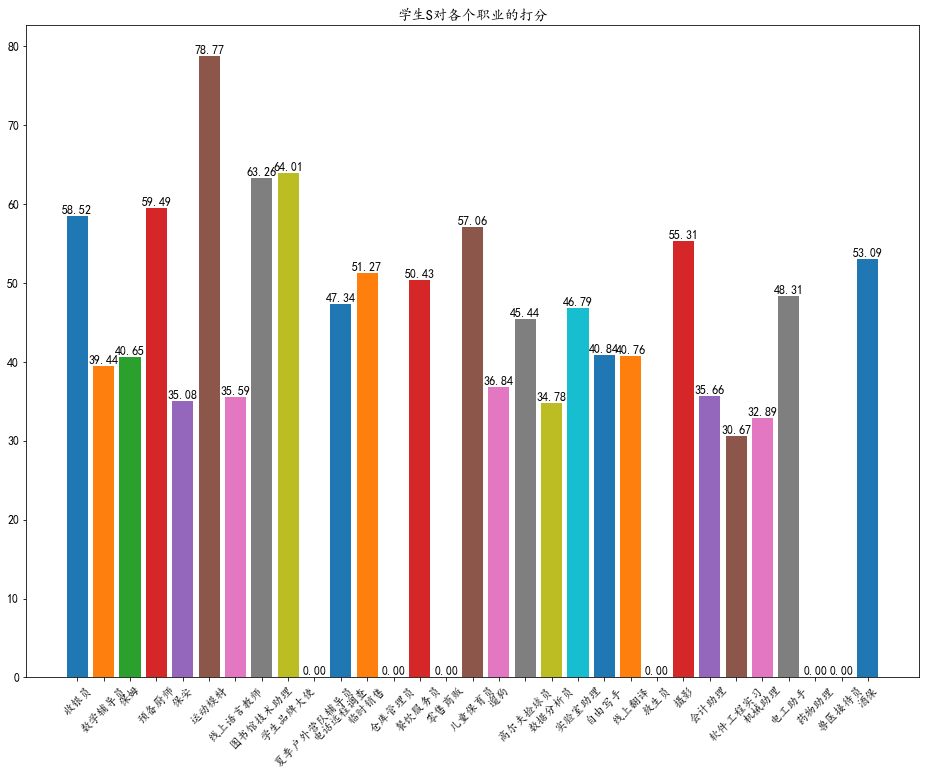

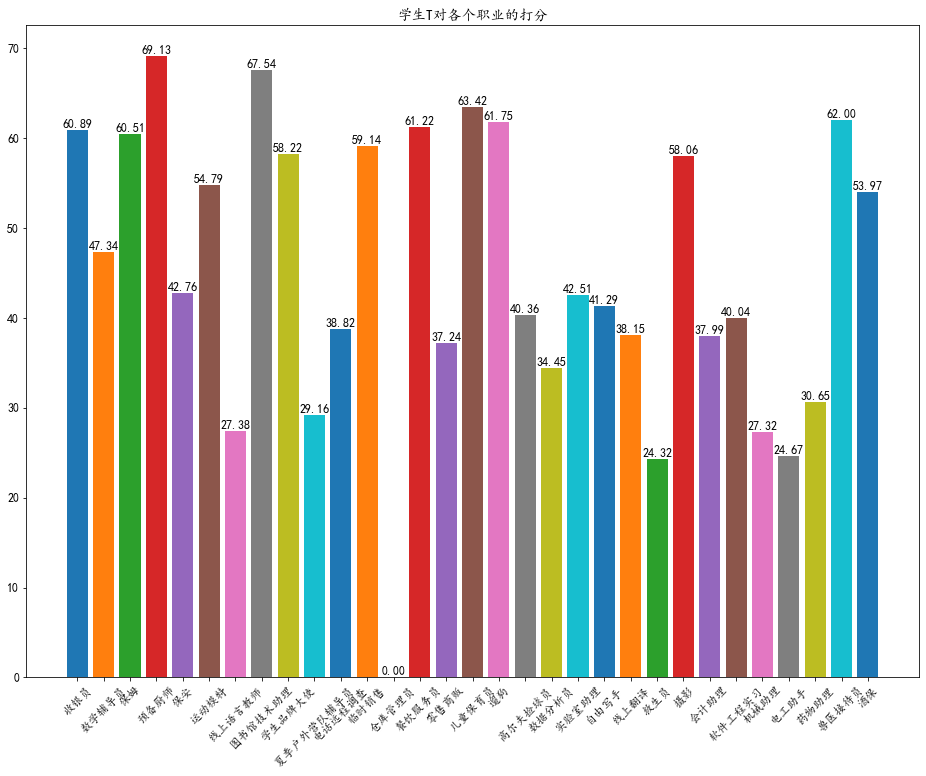

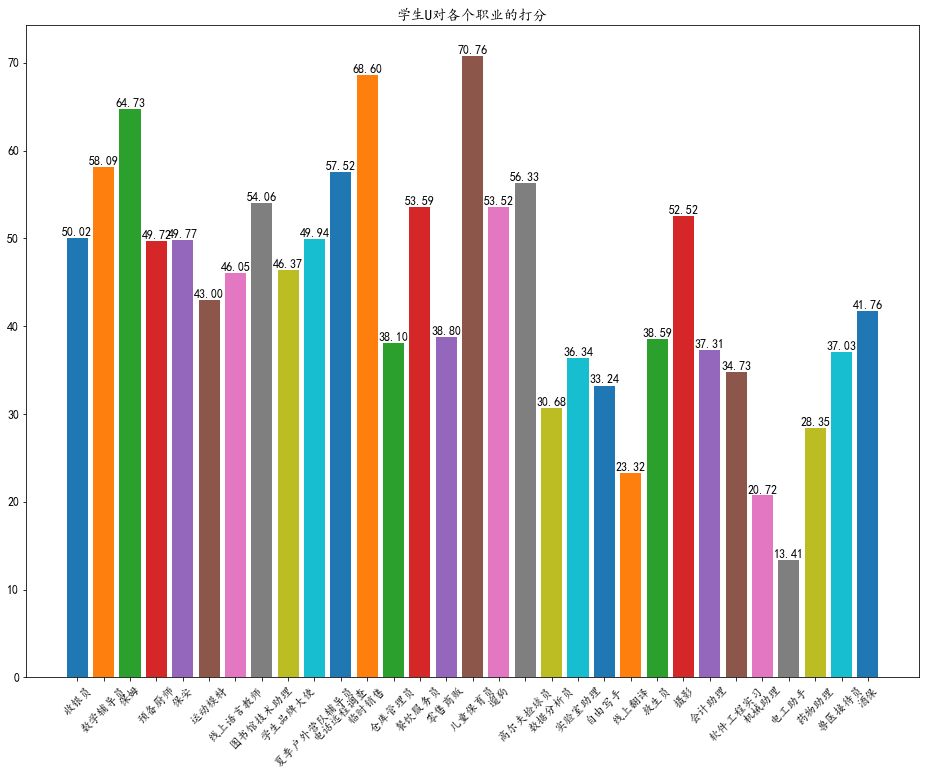

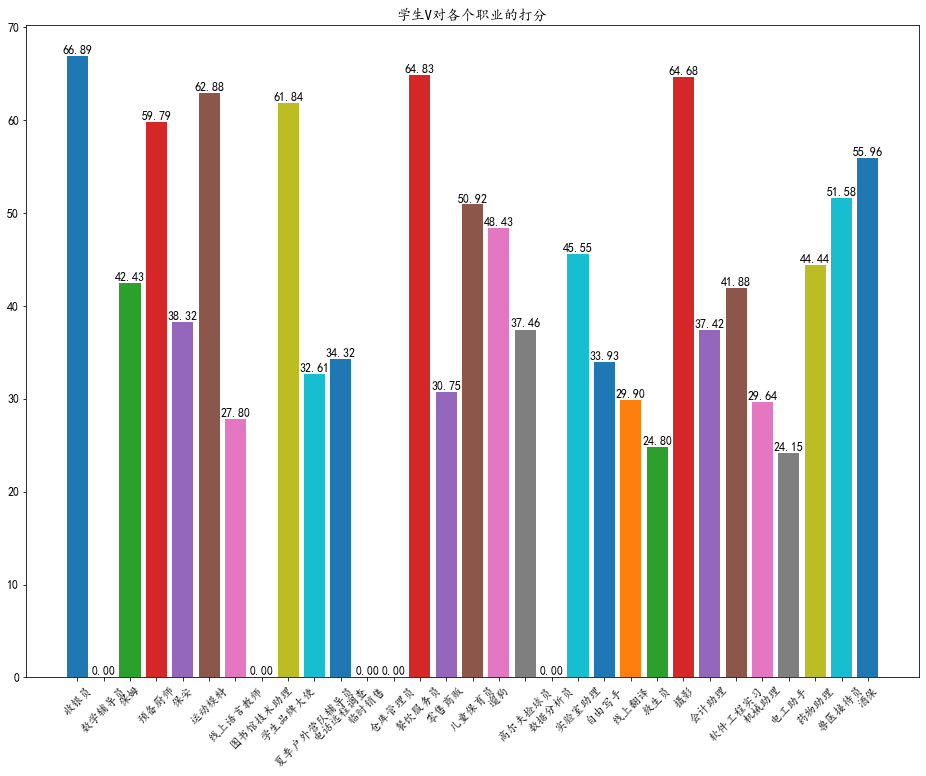

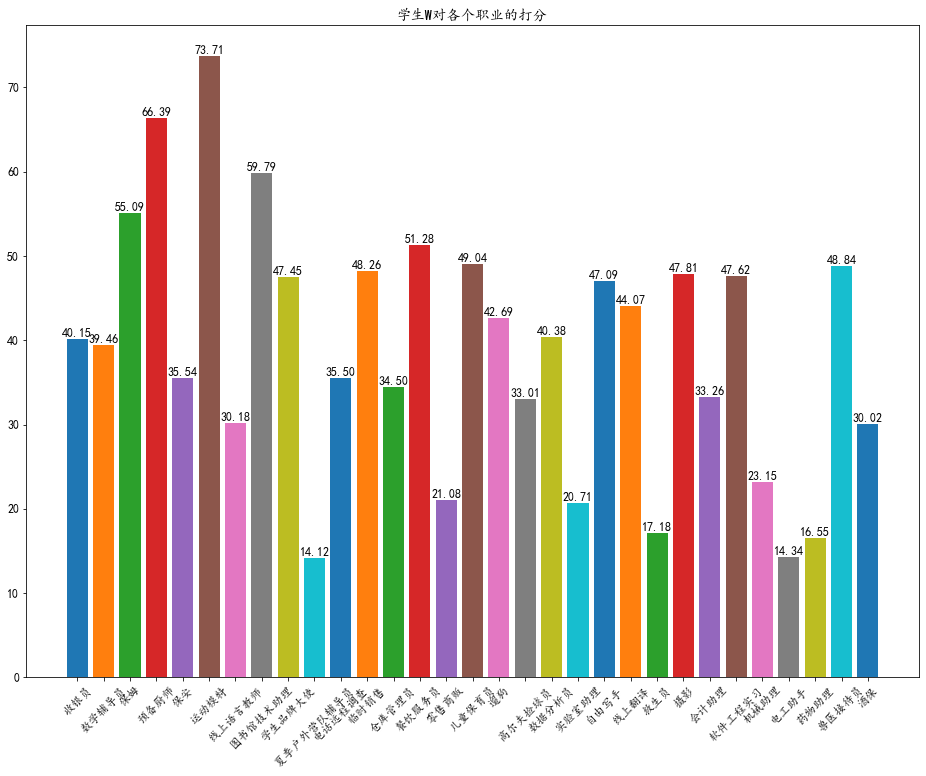

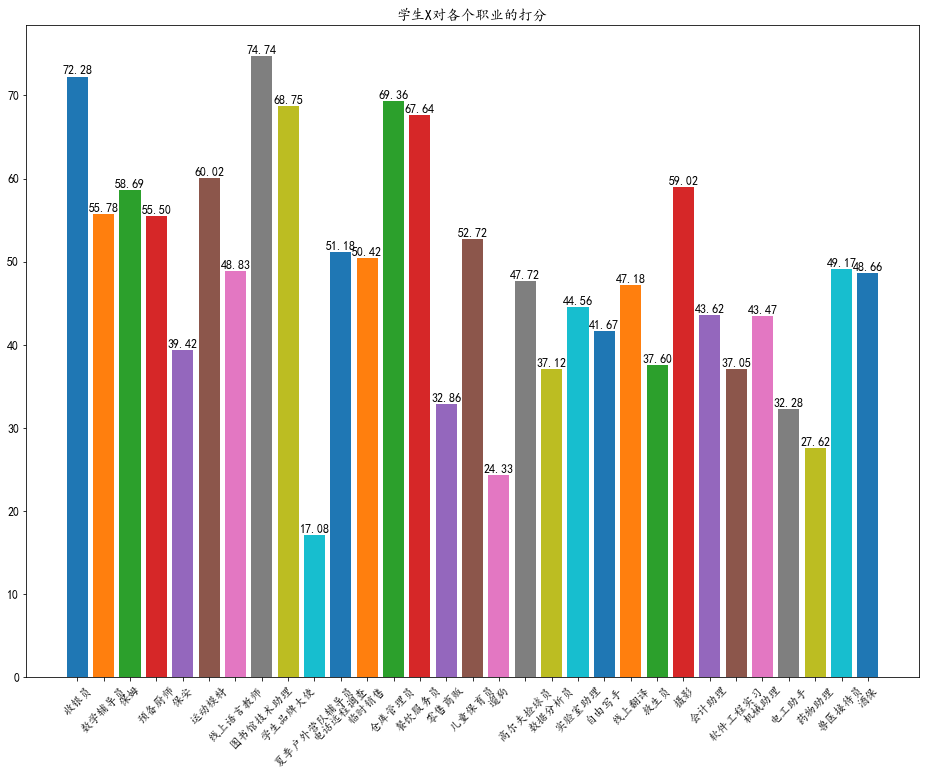

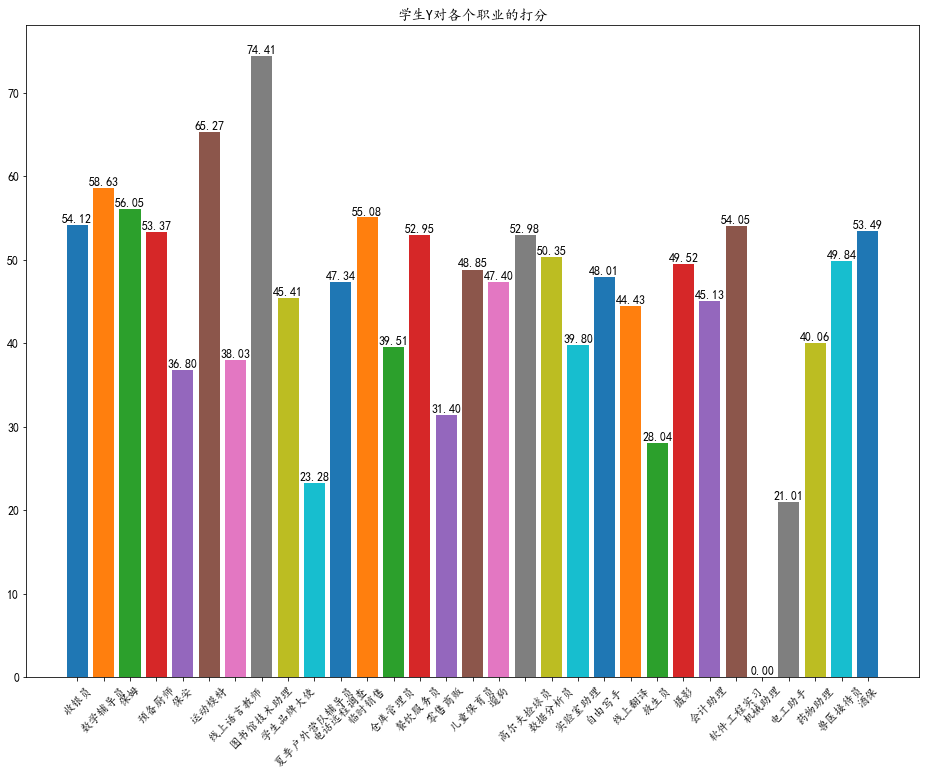

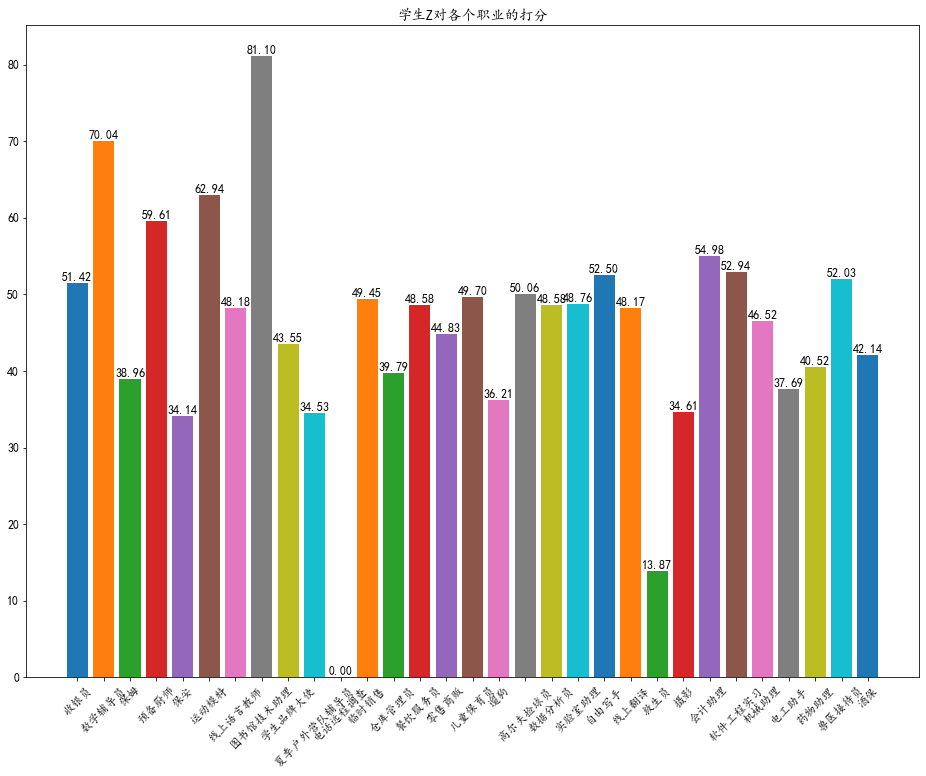

In [22]:
import matplotlib.pyplot as plt
for i in range(26):
    plt.rcParams['font.sans-serif']=['KaiTi','SimHei','FangSong']
    plt.rcParams['font.size']=12
    plt.rcParams['axes.unicode_minus']=False
    plt.rcParams['figure.figsize']=(16,12)
    for j in range(31):
        plt.bar(data1.index[j], score[j,i])
    plt.title(name_dict[i])
    plt.xticks(rotation=45)
    for x,y in zip(data1.index, score[:,i]):
        plt.text(x,y+0.01,'%.2f' %y,ha='center',va='bottom')
    plt.savefig('./分数图片2/'+name_dict[i]+'.jpg')
    plt.show()